In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


df = pd.read_csv('train.csv')

In [2]:
df.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
13434,13434,3.0,No,NaN,5.0,No,11.0,6.0,Extrovert
97,97,4.0,Yes,3.0,0.0,Yes,0.0,1.0,Introvert
4421,4421,2.0,No,8.0,6.0,No,12.0,NaN,Extrovert
4088,4088,3.0,No,4.0,5.0,No,6.0,5.0,Extrovert
4310,4310,9.0,NaN,NaN,2.0,Yes,5.0,0.0,Introvert


In [3]:
df_ids = df['id']

In [4]:
df.drop('id',axis=1,inplace=True) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [6]:
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
df_numerical = df.drop(cat_cols, axis=1).copy()
df_categorical = df[cat_cols]

In [7]:
labels = df['Personality']

In [8]:
labels_num = labels.apply(lambda x:1 if x == 'Extrovert' else 0)

In [9]:
df_numerical = pd.concat([df_numerical,labels_num], axis=1)

In [10]:
df_numerical.sample()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
18504,2.0,8.0,5.0,11.0,3.0,1


In [11]:
def data_preparation(dataframe):
   
    columns = [ 'Stage_fear', 'Drained_after_socializing']
    for column in columns:
        dataframe[column] = dataframe[column].apply(lambda x:1 if x == 'Yes' else 0)
    
    from sklearn.impute import SimpleImputer
    impute = SimpleImputer(strategy='median')
    imputed_data = impute.fit_transform(dataframe)
    dataframe = pd.DataFrame(imputed_data, columns = dataframe.columns, index = dataframe.index)
    
    
     
    columns_list_1 = ['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
    columns_list_2 = ['Going_outside', 'Drained_after_socializing', 'Stage_fear', 'Friends_circle_size', 'Time_spent_Alone']
        
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    pca = PCA(n_components=1)
    std_scl = StandardScaler()
    dataframe['Social_behavior_score'] = pca.fit_transform(
    std_scl.fit_transform(
                dataframe[columns_list_1]
            )
        )
    dataframe['Increased_loneliness'] = dataframe['Stage_fear']*df_numerical['Time_spent_Alone']
    dataframe['Social_anxiety'] = pca.fit_transform(
    std_scl.fit_transform(
                dataframe[columns_list_2]
            )
        )
    return dataframe


In [12]:
test = pd.read_csv('test.csv')
test = data_preparation(test)
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_behavior_score,Increased_loneliness,Social_anxiety
0,18524.0,3.0,0.0,7.0,4.0,0.0,6.0,5.0,0.070990,0.0,-0.295759
1,18525.0,2.0,1.0,0.0,0.0,1.0,5.0,1.0,-3.117199,1.0,2.826910
2,18526.0,3.0,0.0,5.0,6.0,0.0,15.0,9.0,2.011782,0.0,-1.623616
3,18527.0,3.0,0.0,4.0,4.0,0.0,5.0,6.0,-0.441379,0.0,-0.195769
4,18528.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,-2.903754,1.0,3.888643
...,...,...,...,...,...,...,...,...,...,...,...
6170,24694.0,3.0,0.0,5.0,5.0,0.0,9.0,6.0,0.489741,0.0,-0.809703
6171,24695.0,8.0,1.0,2.0,1.0,1.0,0.0,0.0,-3.269403,NaN,4.046933
6172,24696.0,2.0,0.0,4.0,3.0,0.0,9.0,7.0,-0.030687,0.0,-0.537427
6173,24697.0,3.0,0.0,4.0,4.0,0.0,11.0,9.0,0.825826,0.0,-0.795706


In [13]:
df_numerical.corr()['Personality']

Time_spent_Alone          -0.776725
Social_event_attendance    0.702879
Going_outside              0.708869
Friends_circle_size        0.657216
Post_frequency             0.678355
Personality                1.000000
Name: Personality, dtype: float64

In [14]:
def binary_conversion(df, *labels):
    dataset = pd.DataFrame()
    for label in labels:
        dataset[label] = df[label].apply(lambda x:1 if x=='Yes' else 0)
    return dataset

In [15]:
def concat(*datas):
    dfs = []
    for data in datas:
        dfs.append(data)
    concat_df = pd.concat(dfs,axis=1)
    return concat_df

df_numerical = concat(df_numerical, binary_conversion(df, 'Stage_fear', 'Drained_after_socializing'))

In [16]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Social_event_attendance    17344 non-null  float64
 2   Going_outside              17058 non-null  float64
 3   Friends_circle_size        17470 non-null  float64
 4   Post_frequency             17260 non-null  float64
 5   Personality                18524 non-null  int64  
 6   Stage_fear                 18524 non-null  int64  
 7   Drained_after_socializing  18524 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.1 MB


In [17]:
df_numerical.corr()['Personality']

Time_spent_Alone            -0.776725
Social_event_attendance      0.702879
Going_outside                0.708869
Friends_circle_size          0.657216
Post_frequency               0.678355
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
Name: Personality, dtype: float64

We can experiment on Friends_circle_size and Post_frequency  Lets try some feature engineering using this.

In [18]:
def fill_value(data):
    
    from sklearn.impute import SimpleImputer
    impute = SimpleImputer(strategy='median')
    imputed_data = impute.fit_transform(data)
    dataset = pd.DataFrame(imputed_data, columns = data.columns, index = data.index)

    return dataset

df_numerical = fill_value(df_numerical)

In [19]:
df_numerical.corr()['Personality']

Time_spent_Alone            -0.750859
Social_event_attendance      0.674635
Going_outside                0.674389
Friends_circle_size          0.634583
Post_frequency               0.647048
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
Name: Personality, dtype: float64

Now after filling the values it seems to me as the correlation between the label adn 4 features out of 8 has been diluted which in itself is a big problem 

Lets say how many times they attend a social event outside social_event_attendance_per_outing or s_e_a_per_outing

In [20]:
df_numerical['S_e_a_per_outing'] = df_numerical['Social_event_attendance']+df_numerical['Going_outside']

In [21]:
df_numerical.corr()['Personality']

Time_spent_Alone            -0.750859
Social_event_attendance      0.674635
Going_outside                0.674389
Friends_circle_size          0.634583
Post_frequency               0.647048
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
S_e_a_per_outing             0.766395
Name: Personality, dtype: float64

Well not exactly a good feature, let us try something different let's try say something with friends_circle_size and post_frequency

In [22]:
df_numerical['Friends_affect_post'] = df_numerical['Friends_circle_size'] + df_numerical['Post_frequency']

In [23]:
df_numerical.corr()['Personality']

Time_spent_Alone            -0.750859
Social_event_attendance      0.674635
Going_outside                0.674389
Friends_circle_size          0.634583
Post_frequency               0.647048
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
S_e_a_per_outing             0.766395
Friends_affect_post          0.737624
Name: Personality, dtype: float64

Well the two features that i added are totally useless and doesnt hold any real meaning even if it increases the correlation.

---

## 🧠 What is PCA?

**Principal Component Analysis (PCA)** is a technique used to:

* **Reduce dimensionality** (number of features)
* **Capture the most important variance** in the data
* Create new feature(s) that are **combinations of original features**, but uncorrelated

---

## 📌 Your Code Explained

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
```

### 🔹 `PCA(n_components=1)`

This initializes the PCA object to reduce the selected features down to **just 1 principal component** (a new feature).

> Think of it as: “I want 1 compressed version of all the input features.”

---

```python
df_numerical['Social_behavior_score'] = pca.fit_transform(
    df_numerical[['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
)
```

### 🔹 `pca.fit_transform(...)`

This does two things:

1. **`fit`**: Calculates the directions (principal components) that capture the most variance in your selected features.
2. **`transform`**: Projects your original features onto that principal component, resulting in a new 1D array.

So:

* You're selecting 4 columns related to social behavior
* PCA finds the **best linear combination** of those 4 that explains the most variation
* The result is stored as a new column: `'Social_behavior_score'`

> For example:
> `Social_behavior_score = 0.52 * Attendance + 0.33 * Going_out + 0.65 * Friends + 0.48 * Posts`
> (Weights are learned automatically)

---

## ✅ Why Use PCA Here?

You're likely trying to:

* **Combine multiple social-related behaviors** into a **single feature**
* Avoid arbitrary summation (as you did before)
* Capture **more meaningful variation** than simple correlation-based logic

---

## ⚠️ Notes & Warnings

1. PCA **standardizes the data internally** in `sklearn` only if you do it manually. So it's best to scale your features:

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numerical[['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']])
pca = PCA(n_components=1)
df_numerical['Social_behavior_score'] = pca.fit_transform(scaled)
```

2. The resulting `'Social_behavior_score'` is **not interpretable directly**, but is highly useful for:

   * Input to machine learning models
   * Clustering
   * Visualization

---

### ✅ Summary:

This line:

```python
df_numerical['Social_behavior_score'] = pca.fit_transform([...])
```

is doing a **smart, data-driven transformation**:

* Takes 4 correlated features
* Combines them into 1 powerful feature
* Without arbitrary summation
* While keeping maximum information




Therefore, We have to drop the the two rows created

In [24]:
df_numerical.drop(['S_e_a_per_outing', 'Friends_affect_post'], axis=1, inplace=True)

In [25]:
def cross_train_rfc_cls(data, label, n_splits):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import StratifiedKFold
    scores = []
    print('Initialized Scores Successfully ... ')
    skfolds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
    print('Initialized StratifiedKFolds Successfully ...')
    print('Starting Splitting and Training Data ...')
    for train_idx, test_idx in skfolds.split(data, data[label]):
        X_train = data.drop(label, axis=1).iloc[train_idx]
        X_test = data.drop(label, axis=1).iloc[test_idx]
        y_train = data[label].iloc[train_idx]
        y_test = data[label].iloc[test_idx]
        
        rfc = RandomForestClassifier(random_state=42)
        rfc.fit(X_train, y_train)

        pred = rfc.predict(X_test)
        n_correct = (pred == y_test).sum()
        accuracy_score = n_correct/len(y_test)
        scores.append(accuracy_score)
    print('Accuracy Scores Stored')
    print('Succesfully Completed')
    return scores, print(f'Accuracy Scores: {scores}')

In [26]:
cross_train_rfc_cls(df_numerical, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9649122807017544), np.float64(0.9624831309041836), np.float64(0.9619433198380567), np.float64(0.9668016194331984), np.float64(0.964902807775378)]


([np.float64(0.9649122807017544),
  np.float64(0.9624831309041836),
  np.float64(0.9619433198380567),
  np.float64(0.9668016194331984),
  np.float64(0.964902807775378)],
 None)

Lets make another feature to make the accuracy better

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
df_numerical['Social_behavior_score'] = pca.fit_transform(
    df_numerical[['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']])

In [28]:
#But scaling data is always better before performing such things so we should scale the data first

from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
df_numerical['Social_behavior_score'] = pca.fit_transform(
    std_scl.fit_transform(
        df_numerical[['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
    )
)

In [29]:
df_numerical.sample(5)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear,Drained_after_socializing,Social_behavior_score
5119,2.0,6.0,3.0,5.0,6.0,1.0,0.0,0.0,-0.300043
15971,0.0,5.0,4.0,13.0,5.0,1.0,0.0,0.0,0.545057
17940,0.0,9.0,4.0,10.0,7.0,1.0,0.0,0.0,1.304839
9117,5.0,1.0,2.0,3.0,1.0,0.0,0.0,1.0,-2.639489
8505,1.0,5.0,3.0,15.0,8.0,1.0,0.0,0.0,1.064468


In [30]:
cross_train_rfc_cls(df_numerical, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9622132253711201), np.float64(0.9635627530364372), np.float64(0.9622132253711201), np.float64(0.9668016194331984), np.float64(0.9646328293736501)]


([np.float64(0.9622132253711201),
  np.float64(0.9635627530364372),
  np.float64(0.9622132253711201),
  np.float64(0.9668016194331984),
  np.float64(0.9646328293736501)],
 None)

In [31]:
df_numerical.corr()['Personality'].sort_values(ascending = True)

Drained_after_socializing   -0.822843
Stage_fear                  -0.816959
Time_spent_Alone            -0.750859
Friends_circle_size          0.634583
Post_frequency               0.647048
Going_outside                0.674389
Social_event_attendance      0.674635
Social_behavior_score        0.822643
Personality                  1.000000
Name: Personality, dtype: float64

In [32]:
def cross_train_lin_reg_cls(data, label, n_splits):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import StratifiedKFold
    scores = []
    print('Initialized Scores Successfully ... ')
    skfolds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
    print('Initialized StratifiedKFolds Successfully ...')
    print('Starting Splitting and Training Data ...')
    for train_idx, test_idx in skfolds.split(data, data[label]):
        X_train = data.drop(label, axis=1).iloc[train_idx]
        X_test = data.drop(label, axis=1).iloc[test_idx]
        y_train = data[label].iloc[train_idx]
        y_test = data[label].iloc[test_idx]
        
        lin_reg_cls = LogisticRegression(random_state=42)
        lin_reg_cls.fit(X_train, y_train)

        pred = lin_reg_cls.predict(X_test)
        n_correct = (pred == y_test).sum()
        accuracy_score = n_correct/len(y_test)
        scores.append(accuracy_score)
    print('Accuracy Scores Stored')
    print('Succesfully Completed')
    return scores, print(f'Accuracy Scores: {scores}')

In [33]:
cross_train_lin_reg_cls(df_numerical, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9689608636977058), np.float64(0.9668016194331984), np.float64(0.9657219973009447), np.float64(0.9705802968960864), np.float64(0.9711123110151187)]


([np.float64(0.9689608636977058),
  np.float64(0.9668016194331984),
  np.float64(0.9657219973009447),
  np.float64(0.9705802968960864),
  np.float64(0.9711123110151187)],
 None)

In [34]:
df_num_imputed =  df_numerical.drop(
    ['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'],
    axis = 1
).copy()

In [35]:
cross_train_lin_reg_cls(df_num_imputed, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9689608636977058), np.float64(0.9668016194331984), np.float64(0.9657219973009447), np.float64(0.9708502024291498), np.float64(0.9708423326133909)]


([np.float64(0.9689608636977058),
  np.float64(0.9668016194331984),
  np.float64(0.9657219973009447),
  np.float64(0.9708502024291498),
  np.float64(0.9708423326133909)],
 None)

In [36]:
df_num_imputed.corr()['Personality']

Time_spent_Alone            -0.750859
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
Social_behavior_score        0.822643
Name: Personality, dtype: float64

In [37]:
cross_train_rfc_cls(df_num_imputed, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9465587044534413), np.float64(0.9503373819163293), np.float64(0.9417004048582996), np.float64(0.9530364372469635), np.float64(0.95329373650108)]


([np.float64(0.9465587044534413),
  np.float64(0.9503373819163293),
  np.float64(0.9417004048582996),
  np.float64(0.9530364372469635),
  np.float64(0.95329373650108)],
 None)

In [38]:
cross_train_rfc_cls(df_numerical, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9622132253711201), np.float64(0.9635627530364372), np.float64(0.9622132253711201), np.float64(0.9668016194331984), np.float64(0.9646328293736501)]


([np.float64(0.9622132253711201),
  np.float64(0.9635627530364372),
  np.float64(0.9622132253711201),
  np.float64(0.9668016194331984),
  np.float64(0.9646328293736501)],
 None)

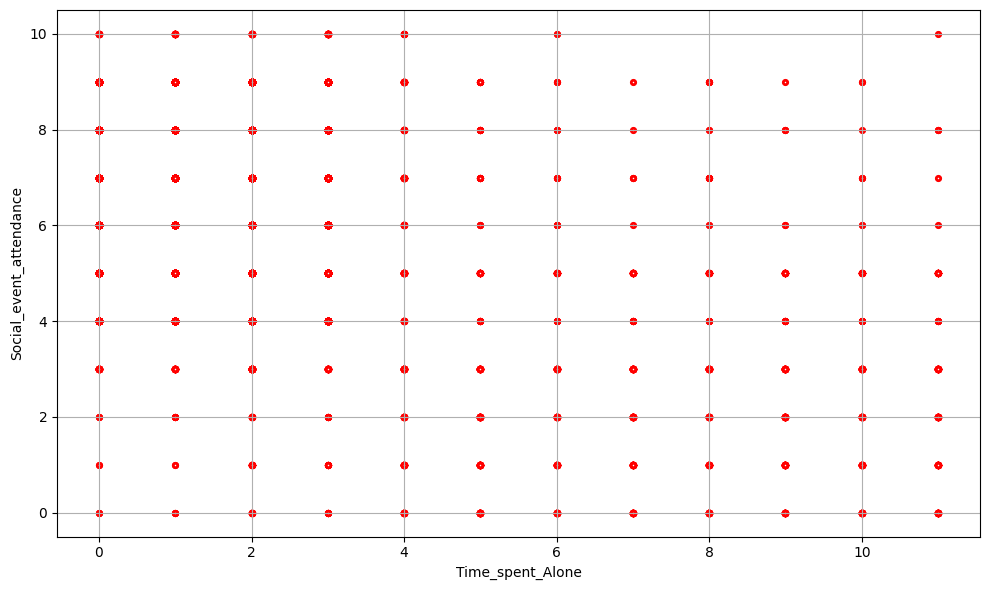

In [39]:
plt.figure(figsize = (10,6))
plt.scatter(
    df_numerical['Time_spent_Alone'], 
    df_numerical['Social_event_attendance'],
    marker='o',           # circle markers
    s=10,                # marker size
    edgecolor='red',            # marker edge color        
    linewidths = 2, 
    facecolor='white'         # marker face color
)
plt.xlabel('Time_spent_Alone')
plt.ylabel('Social_event_attendance')
plt.tight_layout()
plt.grid(True)
plt.show()

In [40]:
# Well these doesn't look much satisfying more like unnecessary

([<matplotlib.axis.YTick at 0x2ad800ffb10>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

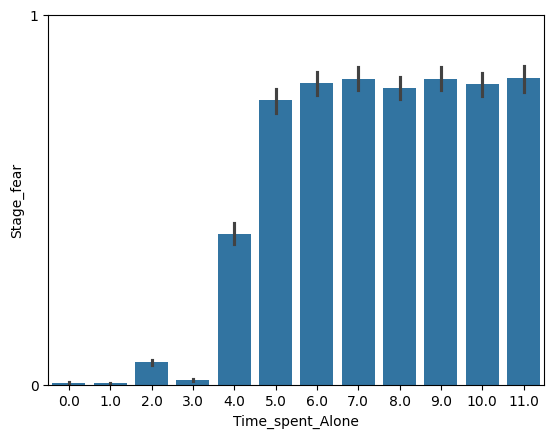

In [41]:
sns.barplot(x = 'Time_spent_Alone', y = 'Stage_fear', data = df_numerical)
plt.yticks(ticks = [0,1])

In [42]:
df_numerical.corr()['Time_spent_Alone']

Time_spent_Alone             1.000000
Social_event_attendance     -0.583718
Going_outside               -0.588716
Friends_circle_size         -0.558255
Post_frequency              -0.563137
Personality                 -0.750859
Stage_fear                   0.715515
Drained_after_socializing    0.718439
Social_behavior_score       -0.717268
Name: Time_spent_Alone, dtype: float64

In [43]:
df_numerical['Increased_loneliness'] = df_numerical['Stage_fear']*df_numerical['Time_spent_Alone']

In [44]:
df_numerical.corr()['Personality']

Time_spent_Alone            -0.750859
Social_event_attendance      0.674635
Going_outside                0.674389
Friends_circle_size          0.634583
Post_frequency               0.647048
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
Social_behavior_score        0.822643
Increased_loneliness        -0.755485
Name: Personality, dtype: float64

In [45]:
cross_train_rfc_cls(df_numerical, 'Personality', 5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9638326585695006), np.float64(0.9630229419703104), np.float64(0.9616734143049932), np.float64(0.9662618083670715), np.float64(0.964902807775378)]


([np.float64(0.9638326585695006),
  np.float64(0.9630229419703104),
  np.float64(0.9616734143049932),
  np.float64(0.9662618083670715),
  np.float64(0.964902807775378)],
 None)

In [46]:
def new_feature(dataframe,new_feature, *prev_features, verbose=False):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    if verbose:
        print(f'Importing features . . .')
    use_features = [f for f in prev_features ]
    if verbose:
        print(f'Features selected . . . ')
    scl = StandardScaler()
    pca_ = PCA(n_components=1)
    if verbose:
        print(f'Using features: {use_features} . . .')
        print(f'Creating new feature . . .')
    dataframe[new_feature] = pca_.fit_transform(
        scl.fit_transform(
            dataframe[use_features]
        )
    )
    if verbose:
        print(f'Succesfully created {new_feature} feature')
new_feature(df_numerical, 'Social_anxiety', 'Going_outside', 'Drained_after_socializing', 'Stage_fear', 'Friends_circle_size', 'Time_spent_Alone', verbose = True)

Importing features . . .
Features selected . . . 
Using features: ['Going_outside', 'Drained_after_socializing', 'Stage_fear', 'Friends_circle_size', 'Time_spent_Alone'] . . .
Creating new feature . . .
Succesfully created Social_anxiety feature


In [47]:
df_numerical.sample(5)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear,Drained_after_socializing,Social_behavior_score,Increased_loneliness,Social_anxiety
10807,4.0,6.0,3.0,12.0,5.0,1.0,0.0,0.0,0.361049,0.0,-0.532847
13321,5.0,5.0,1.0,3.0,0.0,0.0,1.0,1.0,-2.309431,5.0,3.242639
16920,2.0,5.0,6.0,14.0,9.0,1.0,0.0,0.0,1.887426,0.0,-1.683239
7260,2.0,5.0,3.0,13.0,7.0,1.0,0.0,0.0,0.646507,0.0,-0.942201
14531,4.0,9.0,7.0,10.0,7.0,1.0,0.0,0.0,2.069521,0.0,-1.188449


In [48]:
df_numerical.corr()['Personality']

Time_spent_Alone            -0.750859
Social_event_attendance      0.674635
Going_outside                0.674389
Friends_circle_size          0.634583
Post_frequency               0.647048
Personality                  1.000000
Stage_fear                  -0.816959
Drained_after_socializing   -0.822843
Social_behavior_score        0.822643
Increased_loneliness        -0.755485
Social_anxiety              -0.880528
Name: Personality, dtype: float64

In [49]:
cross_train_rfc_cls(df_numerical, 'Personality', n_splits=5)

Initialized Scores Successfully ... 
Initialized StratifiedKFolds Successfully ...
Starting Splitting and Training Data ...
Accuracy Scores Stored
Succesfully Completed
Accuracy Scores: [np.float64(0.9641025641025641), np.float64(0.9638326585695006), np.float64(0.9616734143049932), np.float64(0.9665317139001349), np.float64(0.9651727861771058)]


([np.float64(0.9641025641025641),
  np.float64(0.9638326585695006),
  np.float64(0.9616734143049932),
  np.float64(0.9665317139001349),
  np.float64(0.9651727861771058)],
 None)

In [50]:
def train_rfc(dataframe,label, n_estimators = 100, class_weight = None , random_state = 42, n_jobs = None, verbose = False):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, accuracy_score

    if verbose:
        print('Phase 1: Starting\n\n')
        print('Initailizing Random Forest Algorithm . . .')
        
    rfc_1 = RandomForestClassifier(n_estimators = n_estimators, random_state=42, class_weight = class_weight, n_jobs = n_jobs)

    if verbose: 
        print('Successfully Initialized . . .')
        print('Creating labels and training data . . . ')
    X_1 = dataframe.drop(label, axis=1).copy()
    rfc_1.fit(X_1, dataframe[label])

    if verbose:
        print('Successfully trained . . .')
        print('Predicting on the training set . . .')
    pred_1 = rfc_1.predict(X_1)

    if verbose:
        print('Getting Classification Report . . .')
        print(f'Classification Report: \n{classification_report(dataframe[label], pred_1)}')
    
    importances_1 = rfc_1.feature_importances_
    features = dataframe.drop([label], axis =1).columns
    plt.figure(figsize = (10,6))
    plt.bar(features, importances_1)
    plt.xticks(rotation = 30)
    plt.title('Feature Importances for RandomForestClassification model')
    plt.xlabel('Features')
    plt.ylabel('Importances')
    plt.tight_layout()
    plt.show()

    if verbose:
        print('Completed Phase 1\n\nPhase 2: Starting\n\nTesting on Training Data . . .')
        print('Now, Splitting data using StratifiedShuffleSplit . . .')

    from sklearn.model_selection import StratifiedShuffleSplit

    if verbose:
        print('Initializing StratifiedShuffleSplit')
    sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 42)

    if verbose:
        print('Creating splits and storing  . . .')
    for train_idx, test_idx in sss.split(X_1, dataframe[label]):
        X_train_rfc = dataframe.drop(label,axis=1).iloc[train_idx]
        X_test_rfc = dataframe.drop(label,axis=1).iloc[test_idx]
        y_train_rfc = dataframe[label].iloc[train_idx]
        y_test_rfc = dataframe[label].iloc[test_idx]
    if verbose:
            print('Successfully created and stored the splits . . .')
            print('Initializing RandomForestClassifier')
    rfc_2 = RandomForestClassifier(n_estimators = n_estimators, random_state=42, class_weight = class_weight, n_jobs = n_jobs)
    rfc_2.fit(X_train_rfc, y_train_rfc)
    if verbose:
        print('Predicting . . .')
    pred_2 = rfc_2.predict(X_test_rfc)
    
    if verbose:
        print('Getting Classification Report')
    print(f'Classification Report: \n{classification_report(y_test_rfc, pred_2)}')
    print('Accuracy Score:  ', accuracy_score(y_test_rfc, pred_2))

    if verbose:
        print('Plotting the Imortance v/s Features')

    importances_2 = rfc_2.feature_importances_

    plt.figure(figsize = (10,6))
    plt.bar(features, importances_2)
    plt.xticks(rotation = 45)
    plt.title('Feature Importances for RandomForestClassification model')
    plt.xlabel('Features')
    plt.ylabel('Importances')
    plt.tight_layout()
    plt.show()

    if verbose:
        print('Phase 2 Completed . . .\n Successfully completed training of both Phases.')

Phase 1: Starting


Initailizing Random Forest Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4825
         1.0       0.99      1.00      1.00     13699

    accuracy                           0.99     18524
   macro avg       0.99      0.99      0.99     18524
weighted avg       0.99      0.99      0.99     18524



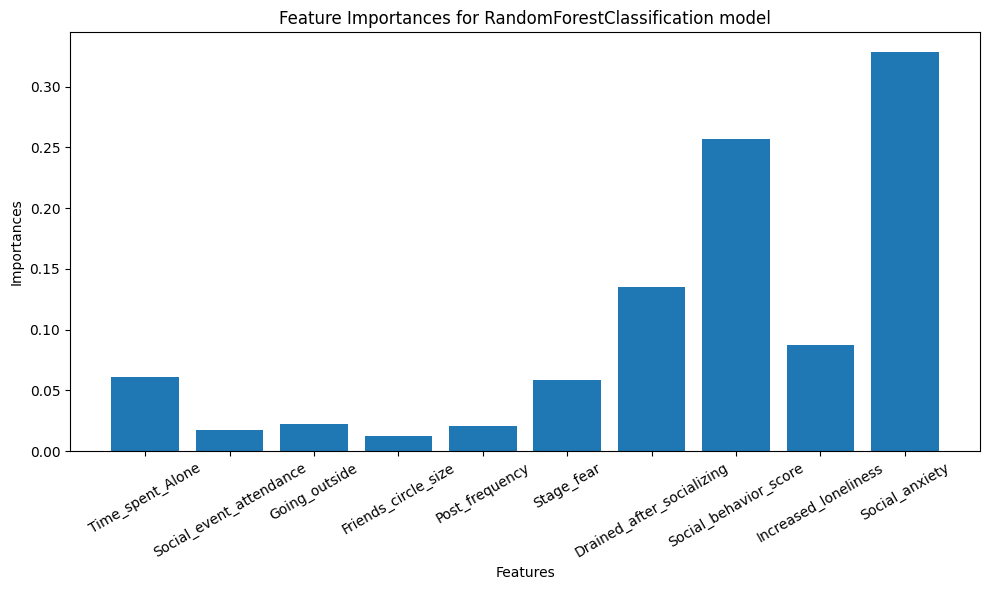

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSplit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing RandomForestClassifier
Predicting . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       965
         1.0       0.98      0.97      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.95      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

Accuracy Score:   0.9654520917678813
Plotting the Imortance v/s Features


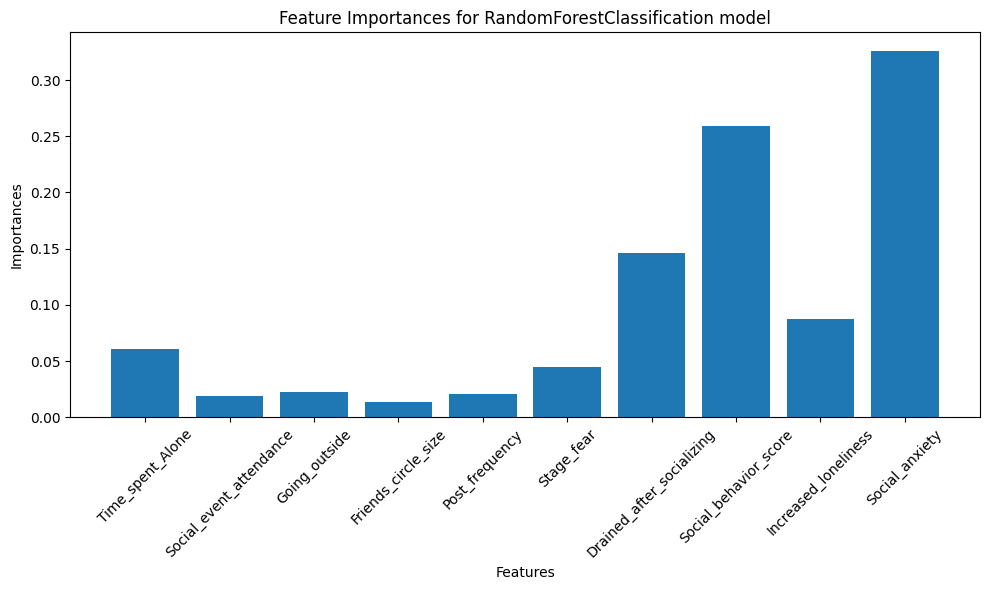

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [51]:
train_rfc(df_numerical, 'Personality', verbose=True)

Phase 1: Starting


Initailizing Random Forest Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4825
         1.0       0.99      1.00      1.00     13699

    accuracy                           0.99     18524
   macro avg       0.99      0.99      0.99     18524
weighted avg       0.99      0.99      0.99     18524



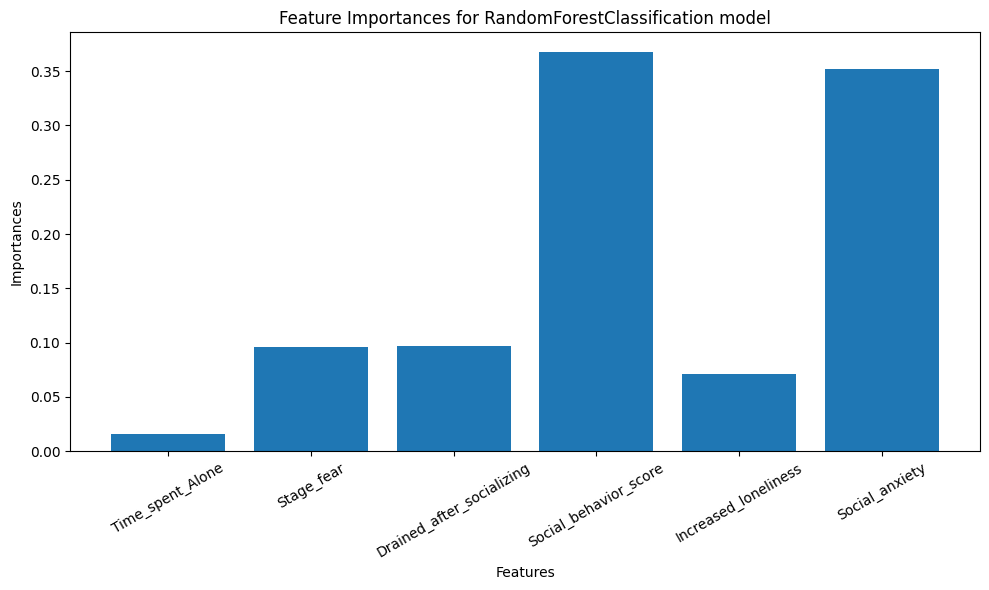

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSplit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing RandomForestClassifier
Predicting . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       965
         1.0       0.98      0.97      0.97      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705

Accuracy Score:   0.9630229419703104
Plotting the Imortance v/s Features


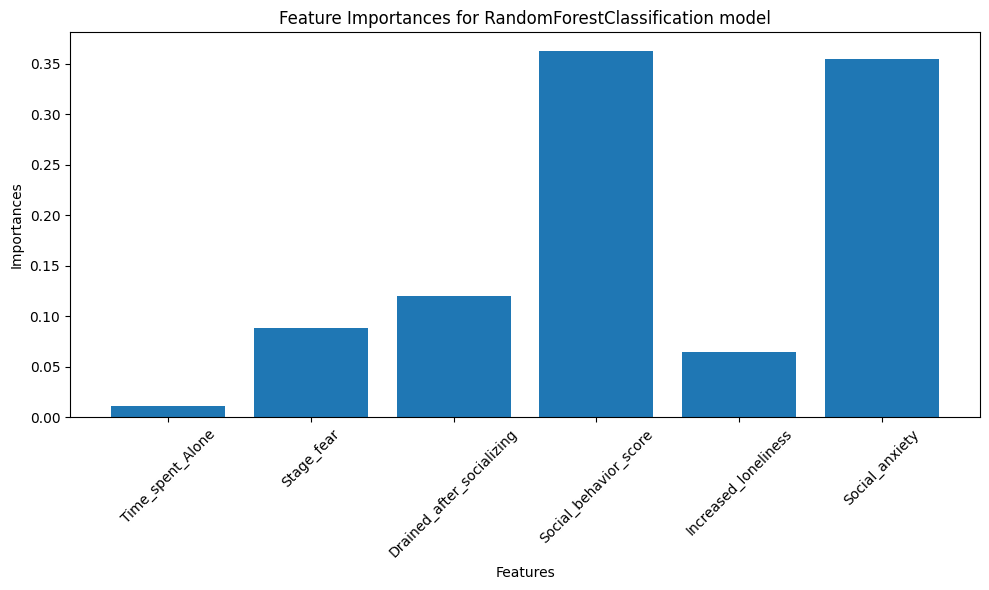

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [52]:
train_rfc(df_numerical.drop(['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'], axis=1), 'Personality', verbose = True)

In [53]:
def train_logreg(dataframe,label, random_state = 42, verbose = False):
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    import numpy as np
    from sklearn.metrics import classification_report, accuracy_score

    if verbose:
        print('Phase 1: Starting\n\n')
        print('Initailizing LogisticRegression Algorithm . . .')
        
    log_reg_1 = LogisticRegression( random_state=42)

    if verbose: 
        print('Successfully Initialized . . .')
        print('Creating labels and training data . . . ')
    scl_1 = StandardScaler()
    X_1 = scl_1.fit_transform(dataframe.drop(label, axis=1).copy())
    log_reg_1.fit(X_1, dataframe[label])

    if verbose:
        print('Successfully trained . . .')
        print('Predicting on the training set . . .')
    pred_1 = log_reg_1.predict(scl_1.transform(X_1))

    if verbose:
        print('Getting Classification Report . . .')
        print(f'Classification Report: \n{classification_report(dataframe[label], pred_1)}')
        print('Printing Importances')
    coefficients_1 = log_reg_1.coef_[0]
    features = dataframe.drop([label], axis =1).columns
    importance_dict_1 = {
        'Feature': features,
        'Importance': coefficients_1
    }
    importance_df_1 = pd.DataFrame(importance_dict_1)
    importance_df_1['Abs_importance'] = np.abs(importance_df_1['Importance'])
    importance_df_1.sort_values(by='Abs_importance', ascending=True, inplace=True)
    
    plt.figure(figsize = (10,6))
    plt.barh(importance_df_1['Feature'], importance_df_1['Importance'], color='skyblue')
    plt.axvline(0, color='gray', linestyle='--')
    plt.xticks(rotation = 30)
    plt.title('Feature Importances for LogisticRegression(coefficients) model')
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.tight_layout()
    plt.show()

    if verbose:
        print('Completed Phase 1\n\nPhase 2: Starting\n\nTesting on Training Data . . .')
        print('Now, Splitting data using StratifiedShuffleSplit . . .')

    from sklearn.model_selection import StratifiedShuffleSplit

    if verbose:
        print('Initializing StratifiedShuffleSPlit')
    sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

    if verbose:
        print('Creating splits and storing  . . .')
    for train_idx, test_idx in sss.split(X_1, dataframe[label]):
        X_train_rfc = dataframe.drop(label,axis=1).iloc[train_idx]
        X_test_rfc = dataframe.drop(label,axis=1).iloc[test_idx]
        y_train_rfc = dataframe[label].iloc[train_idx]
        y_test_rfc = dataframe[label].iloc[test_idx]

    if verbose:
        print('Successfully created and stored the splits . . .')
        print('Initializing LogisticRegression')
    log_reg_2 = LogisticRegression( random_state=42)
    scl_2 = StandardScaler()
    if verbose:
        print('Now training the data on the initialized LogisticRegression Algorithm . . .')
    log_reg_2.fit(scl_2.fit_transform(X_train_rfc), y_train_rfc)
    
    if verbose:
        print('Predicting using the trained algorithm . . .')
    pred_2 = log_reg_2.predict(scl_2.transform(X_test_rfc))

    if verbose:
        print('Getting Classification Report')
    print(f'Classification Report: \n{classification_report(y_test_rfc, pred_2)}')
    print('Accuracy Score:  ', accuracy_score(y_test_rfc, pred_2))

    if verbose:
        print('Plotting the Coefficients v/s Features')

    coefficients_2 = log_reg_2.coef_[0]
    importance_dict_2 = {
        'Feature' : features,
        'Importance': coefficients_2
    }
    importance_df_2 = pd.DataFrame(importance_dict_2)
    importance_df_2['Absolute Importance'] = np.abs(importance_df_2['Importance'])
    importance_df_2.sort_values(by = 'Absolute Importance', ascending = True, inplace = True)
    plt.figure(figsize = (10,6))
    plt.barh(importance_df_2['Feature'], importance_df_2['Importance'], color = 'skyblue')
    plt.axvline(0, color = 'gray', linestyle = '--')
    plt.xticks(rotation = 45)
    plt.title('Feature Importances for LogisticRegression model')
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.tight_layout()
    plt.show()

    if verbose:
        print('Phase 2 Completed . . .\n Successfully completed training of both Phases.')

Phase 1: Starting


Initailizing LogisticRegression Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93      4825
         1.0       0.97      0.98      0.97     13699

    accuracy                           0.96     18524
   macro avg       0.96      0.94      0.95     18524
weighted avg       0.96      0.96      0.96     18524

Printing Importances


C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


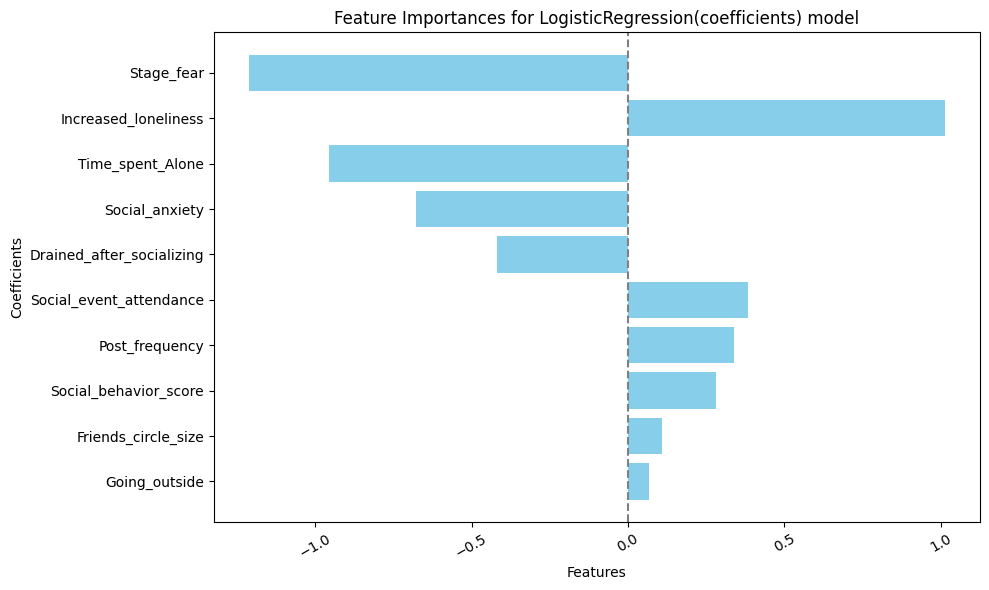

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSPlit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing LogisticRegression
Now training the data on the initialized LogisticRegression Algorithm . . .
Predicting using the trained algorithm . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       965
         1.0       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705

Accuracy Score:   0.9649122807017544
Plotting the Coefficients v/s Features


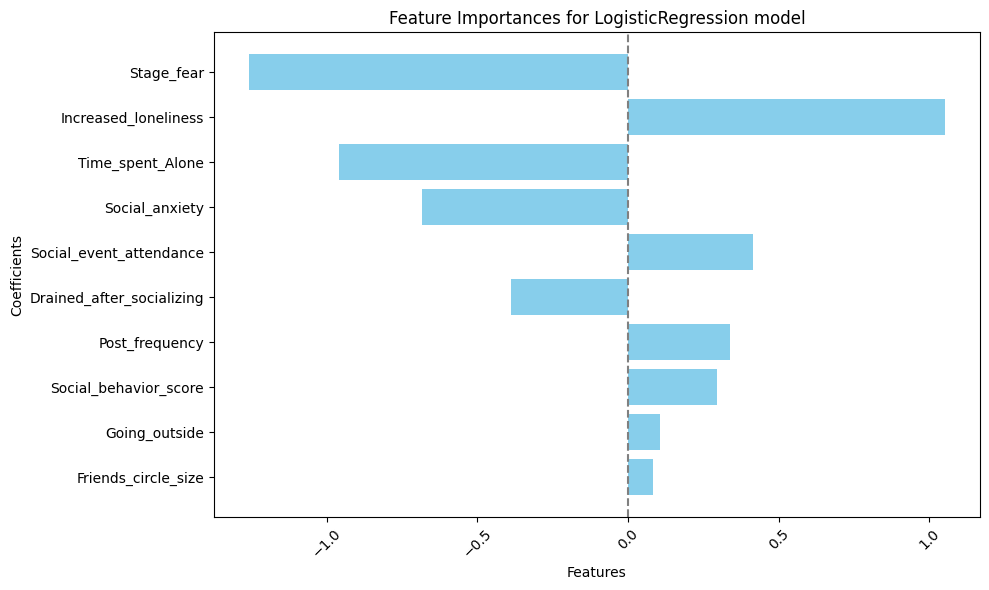

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [54]:
train_logreg(df_numerical, 'Personality', verbose=True)

Phase 1: Starting


Initailizing LogisticRegression Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.78      0.86      4825
         1.0       0.93      0.98      0.95     13699

    accuracy                           0.93     18524
   macro avg       0.93      0.88      0.91     18524
weighted avg       0.93      0.93      0.93     18524

Printing Importances


C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


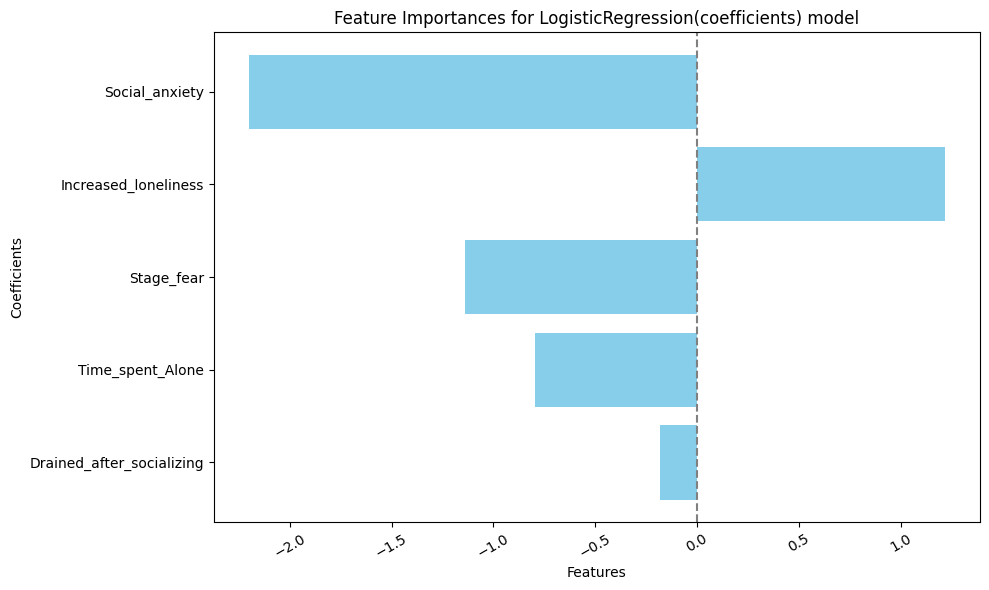

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSPlit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing LogisticRegression
Now training the data on the initialized LogisticRegression Algorithm . . .
Predicting using the trained algorithm . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       965
         1.0       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705

Accuracy Score:   0.9632928475033739
Plotting the Coefficients v/s Features


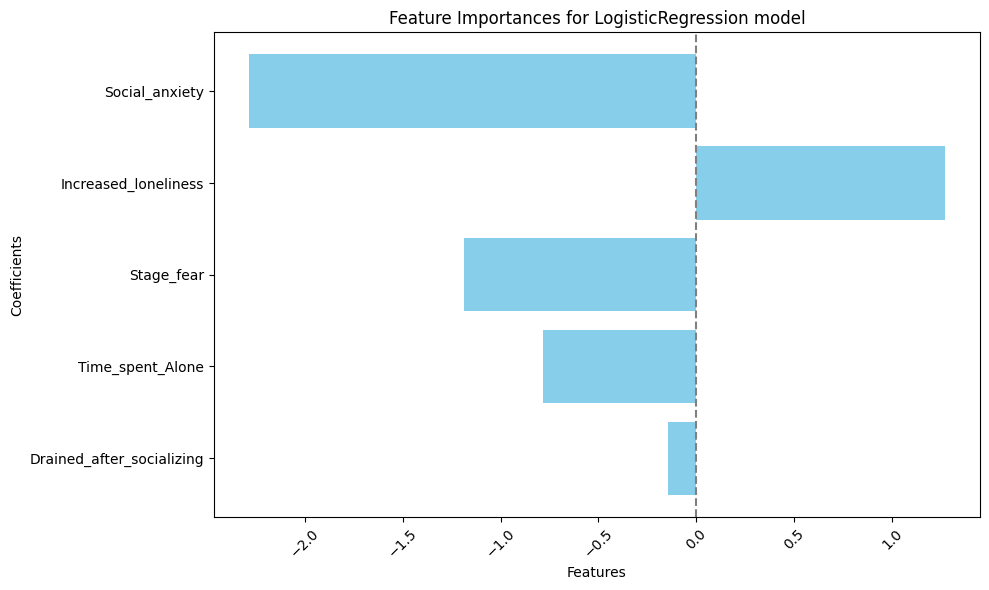

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [55]:
train_logreg(df_numerical.drop(['Friends_circle_size', 'Going_outside', 'Social_behavior_score', 'Post_frequency', 'Social_event_attendance'], axis = 1).copy(), 'Personality', verbose = True)

In [56]:
df_numerical['Alone_x_Fear'] = df_numerical['Time_spent_Alone'] * df_numerical['Stage_fear']
df_numerical['Post_per_friend'] = df_numerical['Post_frequency'] / (df_numerical['Friends_circle_size'] + 1)

Phase 1: Starting


Initailizing Random Forest Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4825
         1.0       0.99      1.00      1.00     13699

    accuracy                           0.99     18524
   macro avg       0.99      0.99      0.99     18524
weighted avg       0.99      0.99      0.99     18524



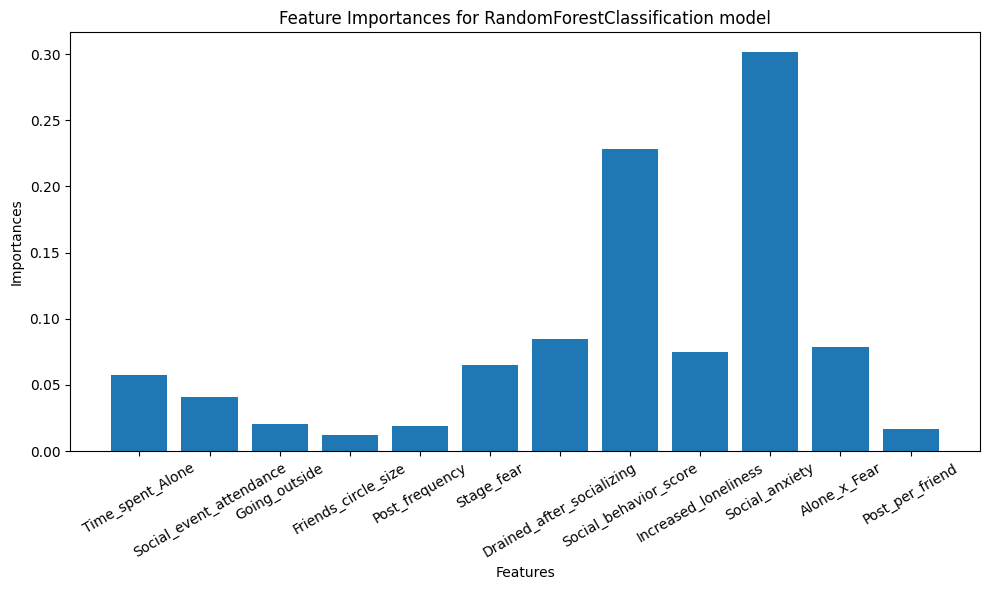

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSplit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing RandomForestClassifier
Predicting . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       965
         1.0       0.98      0.97      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.95      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

Accuracy Score:   0.9654520917678813
Plotting the Imortance v/s Features


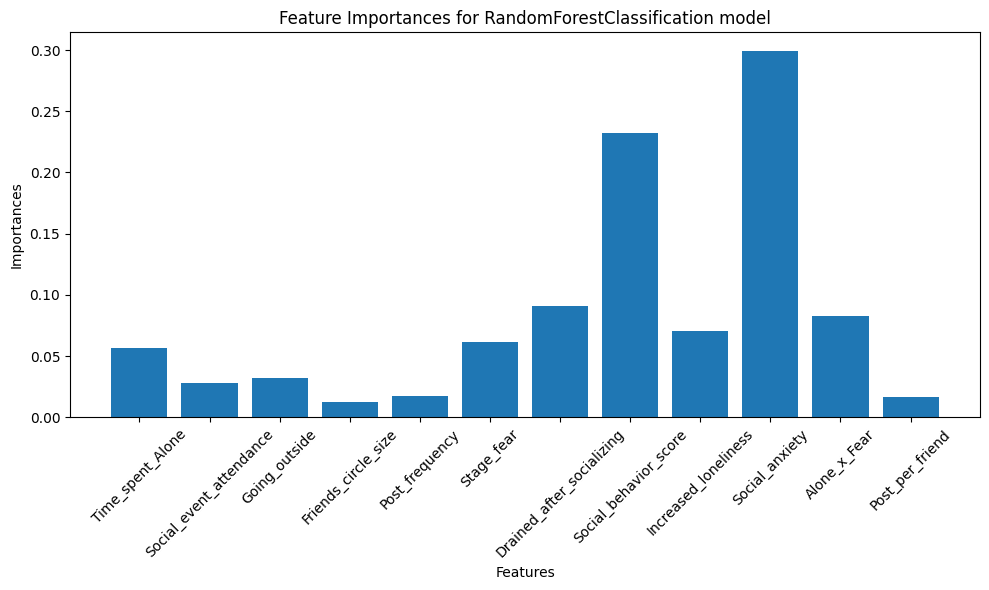

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [57]:
train_rfc(df_numerical, 'Personality', verbose=True)

In [58]:
def train_xgb(dataframe,label, random_state = 42, n_jobs = None, verbose = False):
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report, accuracy_score

    if verbose:
        print('Phase 1: Starting\n\n')
        print('Initailizing XGBClassifier Algorithm . . .')
        
    xgb_1 = XGBClassifier(random_state=42, n_jobs = n_jobs)

    if verbose: 
        print('Successfully Initialized . . .')
        print('Creating labels and training data . . . ')
    X_1 = dataframe.drop(label, axis=1).copy()
    xgb_1.fit(X_1, dataframe[label])

    if verbose:
        print('Successfully trained . . .')
        print('Predicting on the training set . . .')
    pred_1 = xgb_1.predict(X_1)

    if verbose:
        print('Getting Classification Report . . .')
        print(f'Classification Report: \n{classification_report(dataframe[label], pred_1)}')
    
    importances_1 = xgb_1.feature_importances_
    features = dataframe.drop([label], axis =1).columns
    plt.figure(figsize = (10,6))
    plt.bar(features, importances_1)
    plt.xticks(rotation = 30)
    plt.title('Feature Importances for XGBClassifier model')
    plt.xlabel('Features')
    plt.ylabel('Importances')
    plt.tight_layout()
    plt.show()

    if verbose:
        print('Completed Phase 1\n\nPhase 2: Starting\n\nTesting on Training Data . . .')
        print('Now, Splitting data using StratifiedShuffleSplit . . .')

    from sklearn.model_selection import StratifiedShuffleSplit

    if verbose:
        print('Initializing StratifiedShuffleSplit')
    sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 42)

    if verbose:
        print('Creating splits and storing  . . .')
    for train_idx, test_idx in sss.split(X_1, dataframe[label]):
        X_train_rfc = dataframe.drop(label,axis=1).iloc[train_idx]
        X_test_rfc = dataframe.drop(label,axis=1).iloc[test_idx]
        y_train_rfc = dataframe[label].iloc[train_idx]
        y_test_rfc = dataframe[label].iloc[test_idx]
    if verbose:
            print('Successfully created and stored the splits . . .')
            print('Initializing RandomForestClassifier')
    xgb_2 = XGBClassifier(random_state=42, n_jobs = n_jobs)
    xgb_2.fit(X_train_rfc, y_train_rfc)
    if verbose:
        print('Predicting . . .')
    pred_2 = xgb_2.predict(X_test_rfc)
    
    if verbose:
        print('Getting Classification Report')
    print(f'Classification Report: \n{classification_report(y_test_rfc, pred_2)}')
    print('Accuracy Score:  ', accuracy_score(y_test_rfc, pred_2))

    if verbose:
        print('Plotting the Imortance v/s Features')

    importances_2 = xgb_2.feature_importances_

    plt.figure(figsize = (10,6))
    plt.bar(features, importances_2)
    plt.xticks(rotation = 45)
    plt.title('Feature Importances for XGBClassifier model')
    plt.xlabel('Features')
    plt.ylabel('Importances')
    plt.tight_layout()
    plt.show()

    if verbose:
        print('Phase 2 Completed . . .\n Successfully completed training of both Phases.')

Phase 1: Starting


Initailizing XGBClassifier Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      4825
         1.0       0.98      0.99      0.98     13699

    accuracy                           0.98     18524
   macro avg       0.97      0.97      0.97     18524
weighted avg       0.98      0.98      0.98     18524



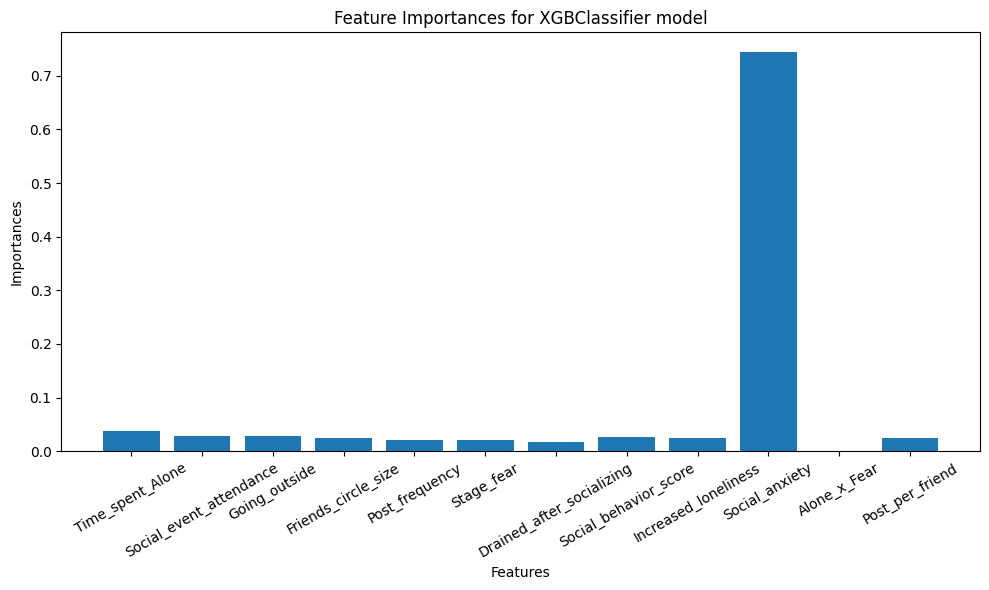

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSplit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing RandomForestClassifier
Predicting . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       965
         1.0       0.98      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

Accuracy Score:   0.9695006747638326
Plotting the Imortance v/s Features


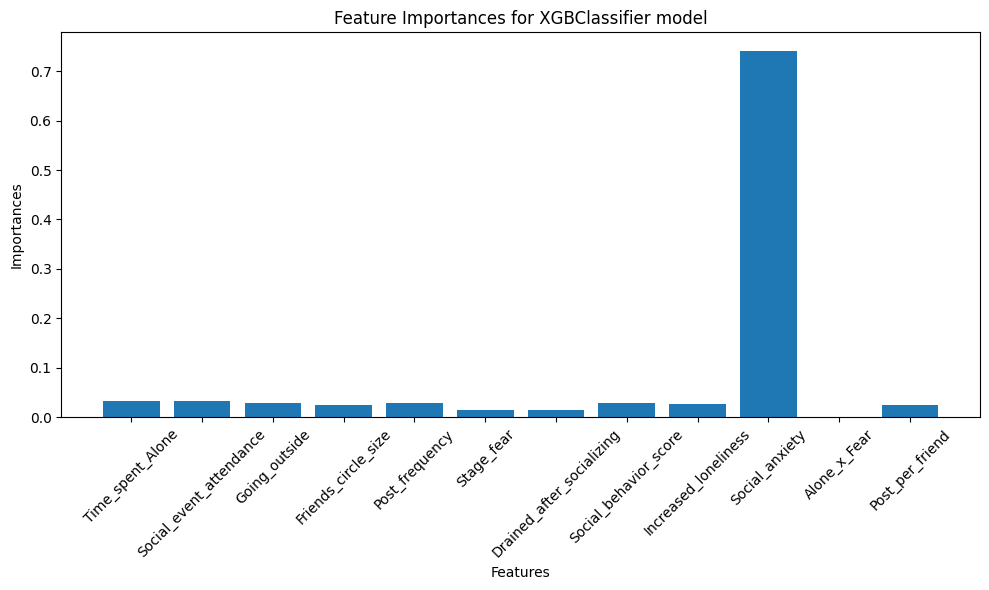

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [59]:
train_xgb(df_numerical, 'Personality', verbose = True)

In [60]:
def c_v_s(model, dataframe, label, cv = 5, verbose = False):
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier

    rfc = RandomForestClassifier(random_state=42)
    log_reg = LogisticRegression(random_state=42)
    xgb = XGBClassifier(random_state=42)
    # lgbm = LightGBM(random_state=42)
    
    if model == 'xgb':
        scores = cross_val_score(xgb, dataframe.drop(label, axis=1).copy(), dataframe[label], cv = cv, verbose = verbose)
    elif model == 'rfc':
        scores = cross_val_score(rfc, dataframe.drop(label, axis=1).copy(), dataframe[label], cv = cv, verbose = verbose)
    elif model == 'log_reg':
        scores = cross_val_score(log_reg, dataframe.drop(label, axis=1).copy(), dataframe[label], cv = cv, verbose = verbose)
    elif model == 'lgbm':
        scores = cross_val_score(lgbm, dataframe.drop(label, axis=1).copy(), dataframe[label], cv = cv, verbose = verbose)

    print(f'Scores: {scores}')
    print(f'Mean Score: {scores.mean()}')

In [61]:
c_v_s('xgb', df_numerical, 'Personality', verbose = True)

Scores: [0.96842105 0.96977058 0.96167341 0.96518219 0.97219222]
Mean Score: 0.9674478916180632


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


In [62]:
import numpy as np
df_numerical['Time_spent_Alone_sq'] = df_numerical['Time_spent_Alone'] ** 2
df_numerical['log_Friends_circle'] = np.log1p(df_numerical['Friends_circle_size'])

Phase 1: Starting


Initailizing XGBClassifier Algorithm . . .
Successfully Initialized . . .
Creating labels and training data . . . 
Successfully trained . . .
Predicting on the training set . . .
Getting Classification Report . . .
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      4825
         1.0       0.98      0.99      0.98     13699

    accuracy                           0.98     18524
   macro avg       0.97      0.97      0.97     18524
weighted avg       0.98      0.98      0.98     18524



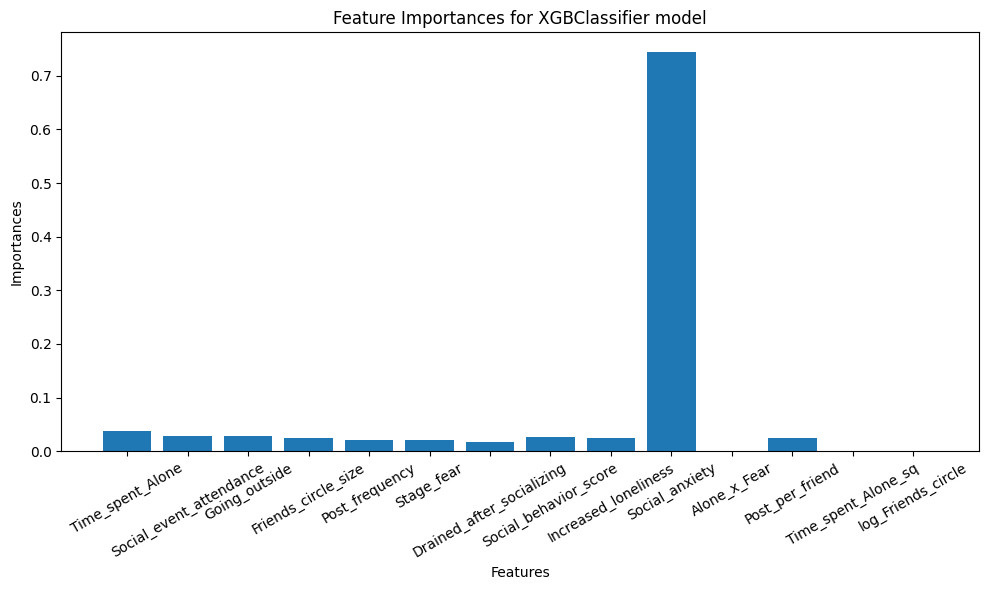

Completed Phase 1

Phase 2: Starting

Testing on Training Data . . .
Now, Splitting data using StratifiedShuffleSplit . . .
Initializing StratifiedShuffleSplit
Creating splits and storing  . . .
Successfully created and stored the splits . . .
Initializing RandomForestClassifier
Predicting . . .
Getting Classification Report
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       965
         1.0       0.98      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

Accuracy Score:   0.9695006747638326
Plotting the Imortance v/s Features


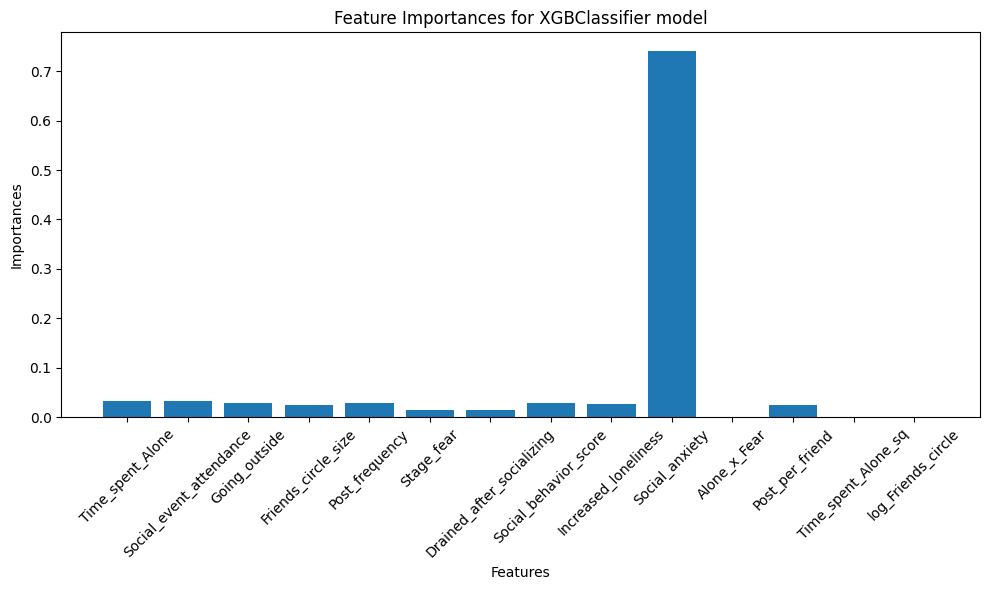

Phase 2 Completed . . .
 Successfully completed training of both Phases.


In [63]:
train_xgb(df_numerical, 'Personality', verbose = True)

In [64]:
c_v_s('xgb', df_numerical, 'Personality', verbose = True)

Scores: [0.96842105 0.96977058 0.96167341 0.96518219 0.97219222]
Mean Score: 0.9674478916180632


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [65]:
df_numerical.drop(['Alone_x_Fear','Post_per_friend', 'Time_spent_Alone_sq', 'log_Friends_circle'],axis=1, inplace=True)

In [66]:
c_v_s('xgb', df_numerical, 'Personality', cv=10, verbose = True)

Scores: [0.96815974 0.96600108 0.96762008 0.97247706 0.96166307 0.96490281
 0.96490281 0.96652268 0.97138229 0.97570194]
Mean Score: 0.9679333554017244


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 42)
for train_idx, test_idx in sss.split(df_numerical.drop('Personality', axis=1).copy(), df_numerical['Personality']):
    X_train_rfc = df_numerical.drop('Personality',axis=1).iloc[train_idx]
    X_test_rfc = df_numerical.drop('Personality',axis=1).iloc[test_idx]
    y_train_rfc = df_numerical['Personality'].iloc[train_idx]
    y_test_rfc = df_numerical['Personality'].iloc[test_idx]
    
stack_model = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('rf', RandomForestClassifier())
    ],
    final_estimator=LogisticRegression()
)

stack_model.fit(X_train_rfc, y_train_rfc)
print(stack_model.score(X_test_rfc, y_test_rfc))

C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:48] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:52] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:53] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:53] WARNING: D:\bld\xgboost-split_1748292851775\work\src\lear

0.9700404858299595


In [68]:
df_numerical.sample(5)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear,Drained_after_socializing,Social_behavior_score,Increased_loneliness,Social_anxiety
14420,1.0,9.0,7.0,14.0,7.0,1.0,0.0,0.0,2.549100,0.0,-2.051817
5086,5.0,5.0,0.0,8.0,0.0,0.0,1.0,1.0,-1.964851,5.0,2.957734
6453,2.0,5.0,4.0,14.0,9.0,1.0,0.0,0.0,1.377639,0.0,-1.255704
9126,3.0,8.0,7.0,14.0,5.0,1.0,0.0,0.0,2.001976,0.0,-1.742197
1766,1.0,3.0,4.0,6.0,3.0,0.0,0.0,0.0,-1.032111,0.0,-0.612637


In [69]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    model = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train_rfc, y_train_rfc, cv=5, scoring='accuracy', n_jobs=-1)
    return score.mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print("Best RF params:", study_rf.best_params)
print("Best RF accuracy:", study_rf.best_value)

[I 2025-07-31 17:53:12,812] A new study created in memory with name: no-name-b3fdd25c-708d-4cc1-a1d8-4e3ac0286234
[I 2025-07-31 17:53:33,783] Trial 0 finished with value: 0.9684188664240887 and parameters: {'n_estimators': 450, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.9684188664240887.
[I 2025-07-31 17:53:45,370] Trial 1 finished with value: 0.9685538191906204 and parameters: {'n_estimators': 155, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.9685538191906204.
[I 2025-07-31 17:54:08,095] Trial 2 finished with value: 0.9682164372742911 and parameters: {'n_estimators': 358, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.9685538191906204.
[I 2025-07-31 17:55:02,033] Trial 3 finished with value: 0.964909980629290

Best RF params: {'n_estimators': 235, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}
Best RF accuracy: 0.9686212955738863


In [70]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 42)
for train_idx, test_idx in sss.split(df_numerical.drop('Personality', axis=1).copy(), df_numerical['Personality']):
    X_train_rfc = df_numerical.drop('Personality',axis=1).iloc[train_idx]
    X_test_rfc = df_numerical.drop('Personality',axis=1).iloc[test_idx]
    y_train_rfc = df_numerical['Personality'].iloc[train_idx]
    y_test_rfc = df_numerical['Personality'].iloc[test_idx]
    
stack_model = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=7,
            n_estimators=100,
            subsample=0.8,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss')),
        ('rf', RandomForestClassifier(
            n_estimators= 137, 
            max_depth= 10, 
            min_samples_split= 8, 
            min_samples_leaf=5, 
            max_features='log2', 
            bootstrap = True
        ))
    ],
    final_estimator=LogisticRegression()
)

stack_model.fit(X_train_rfc, y_train_rfc)
print(stack_model.score(X_test_rfc, y_test_rfc))

C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:24] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:29] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:30] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:31] WARNING: D:\bld\xgboost-split_1748292851775\work\src\lear

0.9705802968960864


In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 42)
for train_idx, test_idx in sss.split(df_numerical.drop('Personality', axis=1).copy(), df_numerical['Personality']):
    X_train_rfc = df_numerical.drop('Personality',axis=1).iloc[train_idx]
    X_test_rfc = df_numerical.drop('Personality',axis=1).iloc[test_idx]
    y_train_rfc = df_numerical['Personality'].iloc[train_idx]
    y_test_rfc = df_numerical['Personality'].iloc[test_idx]
    
stack_model = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=7,
            n_estimators=100,
            subsample=0.8,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss')),
        ('rf', RandomForestClassifier(
            n_estimators= 137, 
            max_depth= 10, 
            min_samples_split= 8, 
            min_samples_leaf=5, 
            max_features='log2', 
            bootstrap = True
        ))
    ],
    final_estimator=XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=7,
            n_estimators=100,
            subsample=0.8,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
    )
)

stack_model.fit(X_train_rfc, y_train_rfc)
print(stack_model.score(X_test_rfc, y_test_rfc))

C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:51] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:55] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:56] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:56] WARNING: D:\bld\xgboost-split_1748292851775\work\src\lear

0.9708502024291498


In [72]:
final_train = df_numerical.drop(['Personality'],axis=1).copy()

In [73]:
final_y = df_numerical['Personality'].copy()

In [74]:
stack_model.fit(final_train, final_y)

C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:15] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:21] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:21] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kumar\anaconda3\envs\learning_phase\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:22] WARNING: D:\bld\xgboost-split_1748292851775\work\src\lear

,estimators,"[('xgb', ...), ('rf', ...)]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [75]:
test = pd.read_csv('test.csv')

In [76]:
import joblib

In [81]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [83]:
imputer.fit(df[['Stage_fear']])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [86]:
Stage_fear = imputer.transform(test[['Stage_fear']])

In [88]:
imputer.fit(df[['Drained_after_socializing']])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [89]:
Drained_after_socializing = imputer.transform(test[['Drained_after_socializing']])

In [90]:
test_num = test.drop(['Drained_after_socializing','Stage_fear'],axis=1).copy()

In [92]:
test_num.drop(['id'],axis=1,inplace=True)

In [93]:
test_num

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,3.0,7.0,4.0,6.0,NaN
1,NaN,0.0,0.0,5.0,1.0
2,3.0,5.0,6.0,15.0,9.0
3,3.0,4.0,4.0,5.0,6.0
4,9.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...
6170,3.0,5.0,5.0,9.0,6.0
6171,8.0,2.0,1.0,0.0,0.0
6172,2.0,4.0,3.0,9.0,7.0
6173,3.0,4.0,4.0,11.0,9.0


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

preprocess = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='median'))
])
process_columns = ['Time_spent_Alone', 'Social_event_attendance','Going_outside', 'Friends_circle_size', 'Post_frequency']
process_pipe = ColumnTransformer(transformers=[
    ('imp', preprocess, process_columns)
])

process_pipe.fit(df)

,transformers,"[('imp', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [100]:
test_num = process_pipe.transform(test_num)

In [104]:
cat_cols = ['Stage_fear', 'Drained_after_socializing']
test_cat = test[cat_cols].copy()

In [108]:
test_cat['Stage_fear']=test_cat['Stage_fear'].apply(lambda x:1 if x == 'Yes' else 0)
test_cat['Drained_after_socializing']=test_cat['Drained_after_socializing'].apply(lambda x:1 if x == 'Yes' else 0)

In [112]:
test_process = pd.concat([pd.DataFrame(test_num, columns = process_columns, index=test.index), test_cat], axis=1)

In [113]:
test_process.isnull().sum()

Time_spent_Alone             0
Social_event_attendance      0
Going_outside                0
Friends_circle_size          0
Post_frequency               0
Stage_fear                   0
Drained_after_socializing    0
dtype: int64

In [115]:

test_process['Social_behavior_score'] = pca.transform(
    std_scl.transform(
        test_process[['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]
    )
)

In [116]:
test_process

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Social_behavior_score
0,3.0,7.0,4.0,6.0,5.0,0,0,0.087355
1,2.0,0.0,0.0,5.0,1.0,1,1,-3.100267
2,3.0,5.0,6.0,15.0,9.0,0,0,2.007321
3,3.0,4.0,4.0,5.0,6.0,0,0,-0.426710
4,9.0,1.0,2.0,1.0,1.0,1,1,-2.879278
...,...,...,...,...,...,...,...,...
6170,3.0,5.0,5.0,9.0,6.0,0,0,0.498543
6171,8.0,2.0,1.0,0.0,0.0,1,1,-3.241458
6172,2.0,4.0,3.0,9.0,7.0,0,0,-0.023853
6173,3.0,4.0,4.0,11.0,9.0,0,0,0.827174


In [117]:
test_process['Increased_loneliness'] = test_process['Stage_fear']*test_process['Time_spent_Alone']

In [118]:
new_feature(test_process, 'Social_anxiety', 'Going_outside', 'Drained_after_socializing', 'Stage_fear', 'Friends_circle_size', 'Time_spent_Alone', verbose = True)

Importing features . . .
Features selected . . . 
Using features: ['Going_outside', 'Drained_after_socializing', 'Stage_fear', 'Friends_circle_size', 'Time_spent_Alone'] . . .
Creating new feature . . .
Succesfully created Social_anxiety feature


In [119]:
test_process

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Social_behavior_score,Increased_loneliness,Social_anxiety
0,3.0,7.0,4.0,6.0,5.0,0,0,0.087355,0.0,-0.295759
1,2.0,0.0,0.0,5.0,1.0,1,1,-3.100267,2.0,2.826910
2,3.0,5.0,6.0,15.0,9.0,0,0,2.007321,0.0,-1.623616
3,3.0,4.0,4.0,5.0,6.0,0,0,-0.426710,0.0,-0.195769
4,9.0,1.0,2.0,1.0,1.0,1,1,-2.879278,9.0,3.888643
...,...,...,...,...,...,...,...,...,...,...
6170,3.0,5.0,5.0,9.0,6.0,0,0,0.498543,0.0,-0.809703
6171,8.0,2.0,1.0,0.0,0.0,1,1,-3.241458,8.0,4.046933
6172,2.0,4.0,3.0,9.0,7.0,0,0,-0.023853,0.0,-0.537427
6173,3.0,4.0,4.0,11.0,9.0,0,0,0.827174,0.0,-0.795706


In [129]:
pred = stack_model.predict(test_process)

In [130]:
labels = {1: 'Extrovert', 0: 'Introvert'}

In [131]:
pred = np.array([labels[i] for i in pred])

In [132]:
pred

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], shape=(6175,), dtype='<U9')

In [135]:
pred = pd.DataFrame(pred, columns = ['Personality'], index = test.index)

In [136]:
pred

,Personality
0,Extrovert
1,Introvert
2,Extrovert
3,Extrovert
4,Introvert
...,...
6170,Extrovert
6171,Introvert
6172,Extrovert
6173,Extrovert


In [137]:
pred = pd.concat([test['id'], pred],axis=1)

In [138]:
pred.to_csv('submission.csv',index=False)